# Helath study python Hamed 

In [146]:
import sys, os
sys.path.append(os.path.abspath(".."))
# Så python kan gå in i Data mappen

In [147]:
# importerar pandas att hanetra tabell-data
#importerar numy  att beräkna och simulera 
#importerar  matplotlib för att visualisera 

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./data/health_study_dataset.csv") # Läser in CSV och sparar i df
df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


# Del 1 grundläggande analys och statistik

In [148]:
#beräknar medelvärde ,median ,min och max  för ålder ,vikt.längt ,systolikt blodtryck och kolestrol 

print("Medel ålder:",df.age.mean())
print("Median ålder:",df.age.median())
print("Min ålder:",df.age.min())
print("Max ålder:",df.age.max())


Medel ålder: 49.42625
Median ålder: 50.0
Min ålder: 18
Max ålder: 90


In [149]:
print("Medel weight:",df.weight.mean())
print("Median weight:",df.weight.median())
print("Min weight:",df.weight.min())
print("Max weight:",df.weight.max())


Medel weight: 73.413
Median weight: 73.2
Min weight: 33.7
Max weight: 114.4


In [150]:
print("Medel height:",df.height.mean())
print("Median height:",df.height.median())
print("Min height:",df.height.min())
print("Max height:",df.height.max())


Medel height: 171.84925000000004
Median height: 171.35000000000002
Min height: 144.4
Max height: 200.4


In [151]:
print("Medel systolic_bp:",df.systolic_bp.mean())
print("Median systolic_bp:",df.systolic_bp.median())
print("Min systolic_bp:",df.systolic_bp.min())
print("Max systolic_bp:",df.systolic_bp.max())


Medel systolic_bp: 149.178625
Median systolic_bp: 149.4
Min systolic_bp: 106.8
Max systolic_bp: 185.9


In [152]:
print("Medel cholesterol:",df.cholesterol.mean())
print("Median cholesterol:",df.cholesterol.median())
print("Min cholesterol:",df.cholesterol.min())
print("Max cholesterol:",df.cholesterol.max())


Medel cholesterol: 4.92915
Median cholesterol: 4.97
Min cholesterol: 2.5
Max cholesterol: 7.88


# Skapar 3 grafer 

#visar fördelning av systolikt blodtryck ,man kan se normalfördelning ,spridning och extremvärde 

#Jämförar median,spridning och outliers (ger tydlig visuell jämförelse mellan kvinnor och män)

#räknar hur många som (röker ,inte röker och visualiseras med staplar )

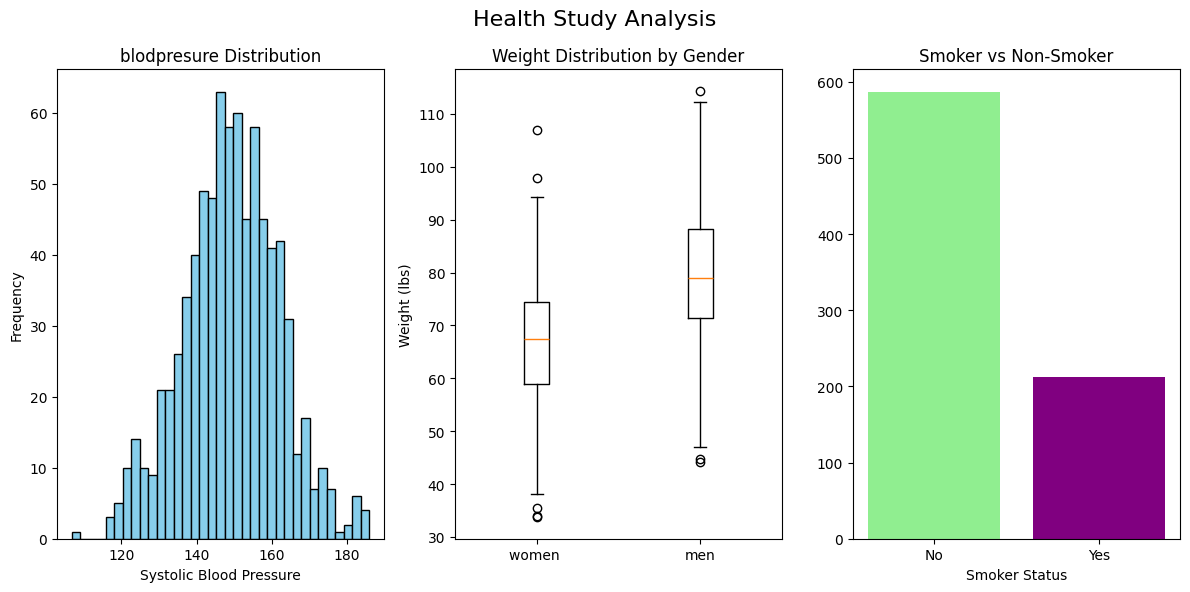

In [166]:
fig ,ax= plt.subplots(1,3,figsize =(12,6))  
ax[0].hist (df.systolic_bp, bins =35, color='skyblue', edgecolor='black')   
ax[0].set_title ('blodpresure Distribution')
ax[0].set_xlabel ('Systolic Blood Pressure')
ax[0].set_ylabel ('Frequency')

#separera könen och tar deras vikter här 
women = df[df["sex"] == "F"]["weight"]
men  = df[df["sex"] == "M"]["weight"]
ax[1].boxplot ([women,men], tick_labels =["women ","men"])
ax[1].set_title ("Weight Distribution by Gender")
ax[1].set_ylabel ("Weight (lbs)")


#kollar på rökare vs icke rökare och räknar deras antal med en bar graph
ax[2].bar(df.smoker.value_counts().index, 
          df.smoker.value_counts().values, color =['lightgreen', 'purple'])
ax[2].set_title ("Smoker vs Non-Smoker")
ax[2].set_xlabel ("Smoker Status")

plt.suptitle ("Health Study Analysis", fontsize =16)
plt.tight_layout ()
                     

# Simulering 
Simulering kopplad till caset (använd numpy.random + seed)

Beräkna andelen personer i datasetet som har sjukdomen.

Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.

Jämför den simulerade andelen med den verkliga andelen i datasetet.


In [154]:

np.random.seed(42)
n=1000

display(len(df[df.disease ==1]))
# jag ser att 47 personer har sjukdomen i datasetet (av 800)

sick_procent = df.disease.mean()
sick_procent
# det motsvarar 5.875% av populationen

47

np.float64(0.05875)

In [155]:
#Eftersom disease är (1=sjuk och 0=frisk ,medelvärde =andel sjuka )
simulated_people = np.random.choice([0,1], size =n, p =[1-sick_procent, sick_procent])
sim_mean = simulated_people.mean()

(sick_procent - sim_mean).round(4)
#Den simulerade andelen är väldigt nära den verkliga andelen 

np.float64(0.0027)

# Konfidensintervall       - CI

#Beräknar standardavvikelse ,standard error och använder z=1,96(95%) - skapar intervall 

In [156]:
bp = df.systolic_bp.to_numpy()
n= len(bp)
mean_bp= bp.mean()
std_bp = bp.std(ddof=1)

se= std_bp / np.sqrt(n)

z =1.96
ci= (mean_bp - 1.96*se, mean_bp + 1.96*se)

print("95% Konfidensintervall för medel blodtryck:", ci)

95% Konfidensintervall för medel blodtryck: (np.float64(148.29209036025347), np.float64(150.06515963974655))


# Hypotesprövning
- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

In [157]:
# Bootstrap (icke parametrisk metod ,slumpar om data medåterläggning och skapar empirisk fördelning av medelvärde )

n = len(df)   # 800 rader i dataframen
np.random.seed(42)   #reproducerbarhet (optional)

#bootstrap
n_boot = 1000                                    #vi kollar 1000 medelvärden
boot_means = []   
array_systolic = df["systolic_bp"].values                               #lagra medelvärdena
for i in range(n_boot):                          # loopa 1000 gånger
    sample = np.random.randint(0,n,n)            # väljer slumpmässigt rader mellan 0-799

    sample_values = array_systolic[sample]          #tar värde från slump rad ,800 gånger 
    boot_means.append(sample_values.mean())        # lägger till medelvärde av 800 gånger valda värden

ci_boot =(np.percentile(boot_means,[2.5,97.5]))  # vi vill se 95% intervall där 2.5% ligger till höger 

display(ci_boot.round(2))                        #ger väldigt lika siffror till normalapproximationen ci 
display(np.mean(boot_means).round(2))            # också väldigt likt normalapproximationens ci 


array([148.31, 150.1 ])

np.float64(149.19)

Använder bootstrap för att ta fram konfidensintervall för medelblodtrycket.

Resultatet blir nästan samma som med normalapproximation, vilket är stabila resultat.

-----------------------------------------------------------------
-----------------------------------------------------------------
#   Del2                      
-----------------------------------------------------------------
-----------------------------------------------------------------

In [158]:
##koden uppdelad i funktioner,moduler och klasser för att notebooken blir ren och lättläst

from src.summary import summary
summary(df)

,Age,Weight,Height,Blood Pressure,Cholesterol
Mean,49.4,73.4,171.8,149.2,4.9
Median,50.0,73.2,171.4,149.4,5.0
Min,18.0,33.7,144.4,106.8,2.5
Max,90.0,114.4,200.4,185.9,7.9


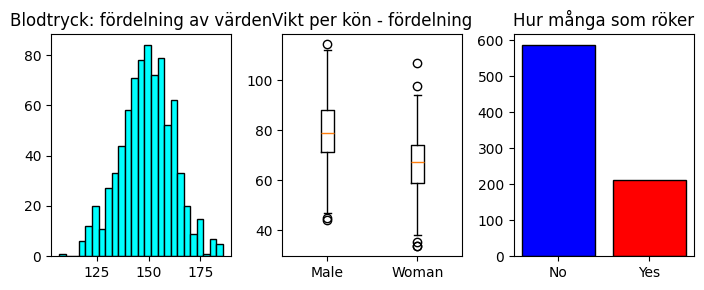

In [159]:
#flyttat plot-logiken till en separat filr (plotter.py)och lagt i mappen src,som fungerar som ett python packet 

from src.plotter import make_plots 
fig, ax = make_plots(df) 

# Den här delen introducerar en enkel klass (analysis_class ) som används i del 2 för att sammla :

#beräkningar (summary /statistik)

#visualiseringar (3 subplots)i ett objekt,istället för att ha all kod direkt i notebooken 


,Age,Weight,Height,Blood Pressure,Cholesterol
Mean,49.4,73.4,171.8,149.2,4.9
Median,50.0,73.2,171.4,149.4,5.0
Min,18.0,33.7,144.4,106.8,2.5
Max,90.0,114.4,200.4,185.9,7.9


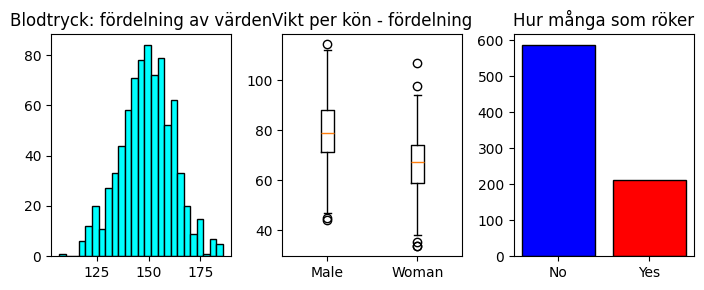

In [160]:


from src.analysis_class import Analysis_class    # importerar analysklassen från objektets src-map

instance_of_class = Analysis_class(df)           #skapar ett analysobjekt och skickar in datasetet (df)

instance_of_class.assign_plots()                 #skapar och visar grafer via klassens metod 
instance_of_class.assign_summary()               # resultaten är avrundade till 1 decimal

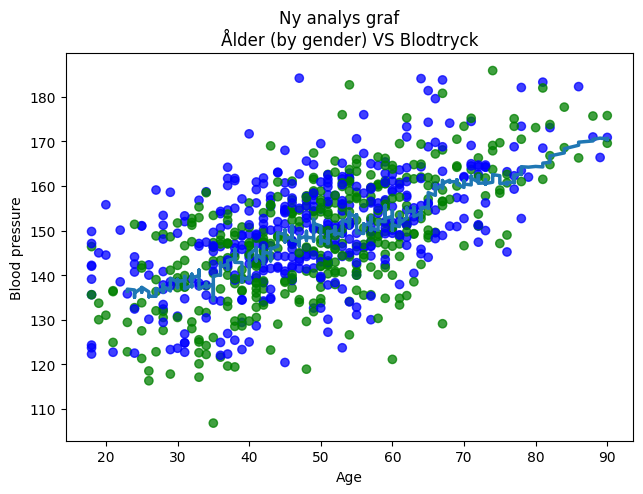

In [161]:
# Flyttat en bonusgraf från del1 samt en ny bonusgraf för del2 'sjuka vs friska (antal)' till modul och kallar nedan in i notebooken.

# importera paket och modul
import matplotlib.pyplot as plt
from src.bonus_plots import bonus_plot_bp_age    # importerar egen funktioner för att rita bonusgrafen från modulen 

# Sätter 2 bonusgrafer sida vid sida 
fig, ax =( plt.subplots())
fig.suptitle("Ny analys graf")
fig.tight_layout()

# Kallar funktionerna från src paketet
bonus_plot_bp_age(df, ax)

##  Linjär algebra i praktiken och Linjär Regression

Här ska numpy eller scikit-learn användas för matris- eller vektoranalys.

Ett förslag var enkel eller multipel regression för att förutspå blodtryck från ålder och vikt.

In [162]:
from sklearn.linear_model import LinearRegression

X = df[["age", "weight"]].values        # vi ska förutspå värden via dessa variabler
y = df["systolic_bp"].values            # ska förutspås

method = LinearRegression()
method.fit(X, y)

print(f"Skärningspunkt y-axel:         {method.intercept_.round(4)}")
print(f"Koefficienterna ålder & vikt: {method.coef_.round(4)}")

Skärningspunkt y-axel:         109.4991
Koefficienterna ålder & vikt: [0.5389 0.1777]


In [163]:
import numpy as np
r2_score = method.score(X,y) # vi använder scikit från innan.
np.round(r2_score,3)

np.float64(0.405)

Detta ger 40.5 procent, påvisandes att en stor del varians är oförklarad av den multipla regressionen vi gjorde (förutspå blodtryck med ålder och vikt).

Näst så kollar vi en graf med .scatter(), för att se hur äkta vs förutspådda datapunkter varierar från en rak linje som ifall alla punkter låg på den skulle modellen perfekt förklara sambandet i datan statistiskt.

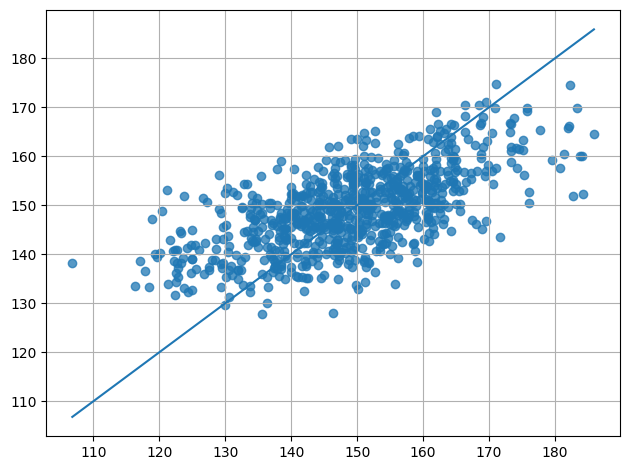

In [164]:
import matplotlib.pyplot as plt
prediction_y = method.predict(X)

plt.figure()
plt.scatter(y, prediction_y, alpha=0.75)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.grid(True)
plt.tight_layout()

Eftersom punkterna är spridda runtom linjen gör sig $R^2\approx 40\%$ visualiserad, påtalandes endast hyfsad koppling mellan äkta och förutsägning av blodtryck med denna multipla regression.

Det fortsätter med analys av rester:

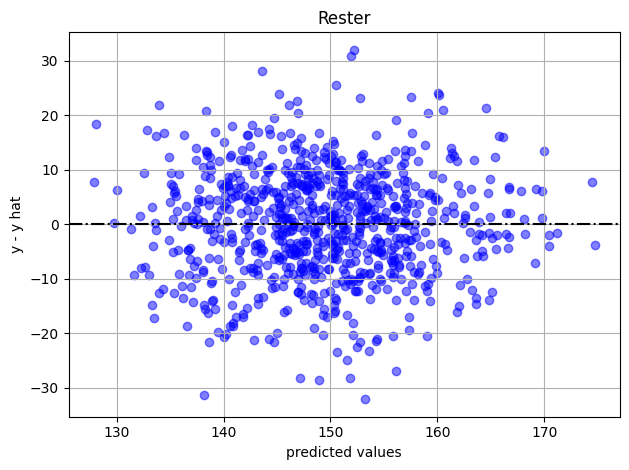

In [167]:
residual = y - prediction_y

plt.figure()
plt.scatter(prediction_y, residual, color="blue", alpha=0.5)
plt.axhline(0, color="black", linestyle="-.")
plt.title("Rester")
plt.ylabel("y - y hat")
plt.xlabel("predicted values")
plt.grid(True)
plt.tight_layout()
plt.show()

Grafen visar en jämförelse mellan förväntade värden och faktiskt observerade värden.
---